Compares model nowcasts to VENUS temperature and salinity data. Data is from the East and Central nodes.

In [1]:
import matplotlib.pyplot as plt
from salishsea_tools.nowcast import analyze
from salishsea_tools.nowcast import figures
from salishsea_tools.nowcast import research_VENUS
from salishsea_tools import tidetools
import datetime
from dateutil import tz
import numpy as np
import netCDF4 as nc

%matplotlib inline

In [2]:

grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, X, Y = tidetools.get_bathy_data(grid_B)


In [3]:
T = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/01feb15/SalishSea_1d_20150201_20150201_grid_T.nc')
model_depths = T.variables['deptht'][:]



In [4]:
def truncate(data, t_o,t_f):
    sdt=t_o.replace(tzinfo=tz.tzutc()); edt=t_f.replace(tzinfo=tz.tzutc())
    data_trun = data[(data.date< edt) & (data.date >sdt)]
    return data_trun

In [5]:
data= research_VENUS.load_VENUS('East')

In [6]:
data[['sal','temp']]=data[['sal','temp']].astype(float)
data.sal

0     30.2439
1     30.2272
2     30.2845
3     30.3073
4     30.4165
5     30.5648
6     30.5770
7     30.5765
8     30.5728
9     30.5724
10    30.5673
11    30.5389
12    30.5137
13    30.4910
14    30.3949
...
63304    30.3372
63305    30.3231
63306    30.3132
63307    30.3237
63308    30.3564
63309    30.3585
63310    30.3614
63311    30.4011
63312    30.4351
63313    30.4519
63314    30.4911
63315    30.6424
63316    30.7553
63317    30.7573
63318    30.7310
Name: sal, Length: 63319, dtype: float64

In [7]:
t_o=datetime.datetime(2014,11,11); t_f = datetime.datetime(2015,3,9)
sdt=t_o.replace(tzinfo=tz.tzutc()); edt=t_f.replace(tzinfo=tz.tzutc())
data_trun =truncate(data ,sdt,edt)

In [8]:
def compare_temp_sal_timeseries(station,figsize=(15,5)):
    data= research_VENUS.load_VENUS(station)
    lon = research_VENUS.SITES['VENUS'][station]['lon']
    lat = research_VENUS.SITES['VENUS'][station]['lat']
    depth = research_VENUS.SITES['VENUS'][station]['depth']
    data[['sal','temp']]=data[['sal','temp']].astype(float)
    data_trun = truncate(data,t_o,t_f)
    
    k = tidetools.find_model_level(depth,model_depths)
    print model_depths[k], depth
    
    [j,i] = tidetools.find_closest_model_point(lon,lat,X,Y,bathy)

    sal, time = analyze.combine_files(fnames,'vosaline',k,j,i) #consider interpolating ?
    temp, time = analyze.combine_files(fnames,'votemper',k,j,i) #consider interpolating ?
    
    fig,axs= plt.subplots(2,1,figsize=figsize)
    ax=axs[0]
    ax.plot(time,sal,label='model')
    ax.plot(data.date[:],data.sal[:],'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Salinity comparison -  VENUS {}'.format(station))
    ax.set_ylabel('Salinty [PSU]')
    print 'Observed Salinity: Mean {}, std {}'.format(data_trun.sal.mean(), data_trun.sal.std())    
    print 'Modelled Salinity: Mean {}, std {}'.format(np.mean(sal), np.std(sal))   
    
    ax=axs[1]
    ax.plot(time,temp,label='model')
    ax.plot(data.date[:],data.temp[:],'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Temp. comparison - VENUS {}'.format(station))
    ax.set_ylabel('Temperature (deg C)')
    print 'Observed Temperature: Mean {}, std {}'.format(data_trun.temp.mean(), data_trun.temp.std())    
    print 'Modelled Temperature: Mean {}, std {}'.format(np.mean(temp), np.std(temp))   
    
    
    return fig

# Nowcasts

In [9]:
t_o=datetime.datetime(2014,11,11); t_f = datetime.datetime(2015,5,21)
fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/data/dlatorne/MEOPAR/SalishSea/nowcast/')

306.834 300
Observed Salinity: Mean 31.0737748018, std 0.078836195793
Modelled Salinity: Mean 30.5782922312, std 0.0770333584133
Observed Temperature: Mean 9.32274334802, std 0.121109974321
Modelled Temperature: Mean 9.6777289307, std 0.0764468361492


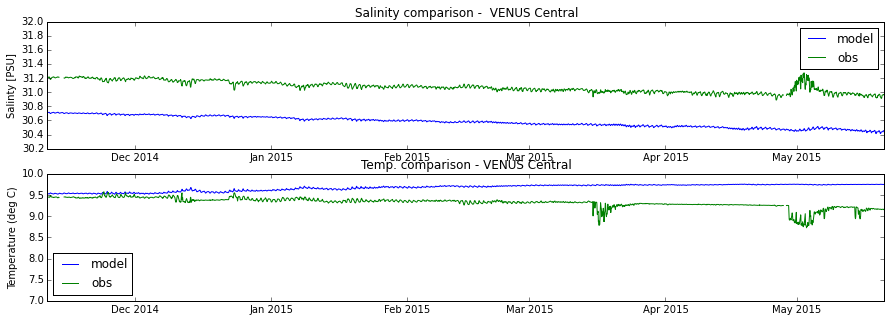

In [10]:

fig = compare_temp_sal_timeseries('Central')

173.114 170
Observed Salinity: Mean 30.5560132543, std 0.328876519354
Modelled Salinity: Mean 30.2880315127, std 0.171223810016
Observed Temperature: Mean 9.25284426158, std 0.32138303562
Modelled Temperature: Mean 9.78007697624, std 0.128147457173


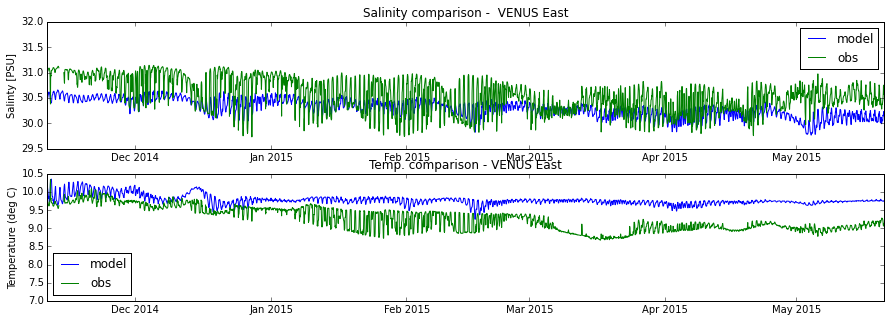

In [11]:
fig = compare_temp_sal_timeseries('East')

* I think we may have had multiple sims for a single day in early November. Just ignore that.
* Interpolate model to correct depth?

# Spin ups

Duh, no VENUS results in 2003...

Still nice to see the time series. Good to know this function applies to more than just the nowcasts.

In [12]:
t_o=datetime.datetime(2003,1,1); t_f = datetime.datetime(2003,12,31)


fnames = analyze.get_filenames(t_o, t_f, '1d', 'grid_T', '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/')

306.834 300
Observed Salinity: Mean nan, std nan
Modelled Salinity: Mean 30.8734360943, std 0.0777241374699
Observed Temperature: Mean nan, std nan
Modelled Temperature: Mean 9.52961612074, std 0.28481585858


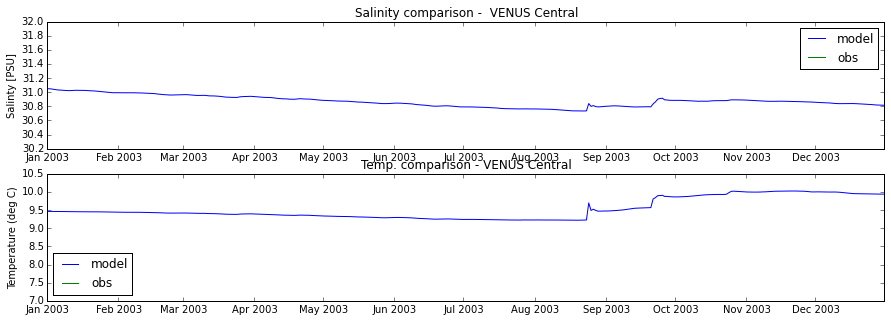

In [13]:
fig = compare_temp_sal_timeseries('Central')

173.114 170
Observed Salinity: Mean nan, std nan
Modelled Salinity: Mean 30.6087996235, std 0.111248610656
Observed Temperature: Mean nan, std nan
Modelled Temperature: Mean 9.40323405331, std 0.588051068155


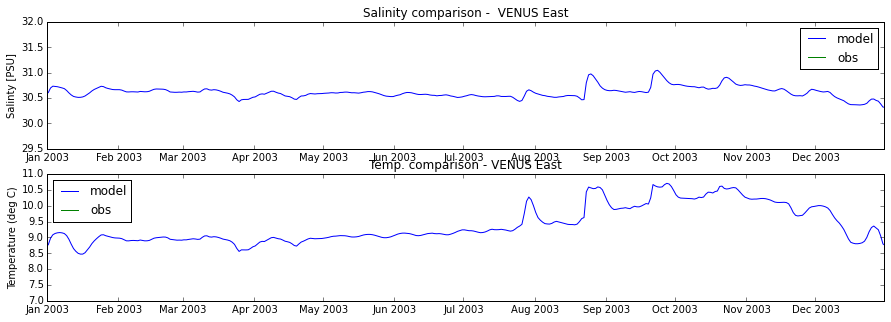

In [14]:
fig = compare_temp_sal_timeseries('East')

# Spectrum

In [15]:
t_o=datetime.datetime(2014,11,10); t_f = datetime.datetime(2015,3,9)
fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/data/dlatorne/MEOPAR/SalishSea/nowcast/')

In [16]:
station = 'East'
data= research_VENUS.load_VENUS(station)
lon = research_VENUS.SITES['VENUS'][station]['lon']
lat = research_VENUS.SITES['VENUS'][station]['lat']
depth = research_VENUS.SITES['VENUS'][station]['depth']
    
k = tidetools.find_model_level(depth,model_depths)
print model_depths[k], depth
    
[j,i] = tidetools.find_closest_model_point(lon,lat,X,Y,bathy)

sal, time = analyze.combine_files(fnames,'vosaline',k,j,i) #consider interpolating ?
temp, time = analyze.combine_files(fnames,'votemper',k,j,i) #consider interpolating ?

173.114 170


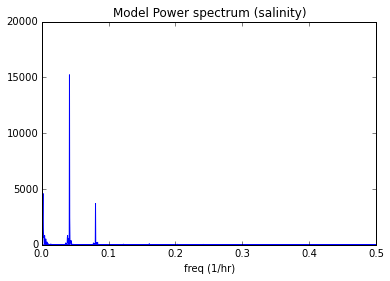

In [17]:
fig,ax=plt.subplots(1,1)

# model
ps = np.abs(np.fft.fft((sal)))**2
freqs = np.fft.fftfreq(sal.size, 1)
ax.plot(freqs,ps)
ax.set_ylim([0,2*10**4])
ax.set_xlim([0,.5])
ax.set_xlabel('freq (1/hr)')
ax.set_title('Model Power spectrum (salinity)')

* Strong signals at about 0.04 (1/24) and 0.08 (1/12) 
* Tidal frequencies
* Hard to do the fft on VENUS data because it contains NaNs. Will tackle this later..